In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(
    'MachineLearningRating_v3.txt',
    delimiter='|',
    dtype={32: str, 37: str}
)
data.head()
#load your data

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

**Data Understanding** - Summarization

1. Descriptive Statistics

In [5]:
descriptive_stats = data[['TotalPremium', 'TotalClaims']].describe()
descriptive_stats

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


2. Data Structure

In [7]:
data_info = data.dtypes
print(data_info)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

3. Data Quality Assessment

In [8]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

4. Univariate Analysis

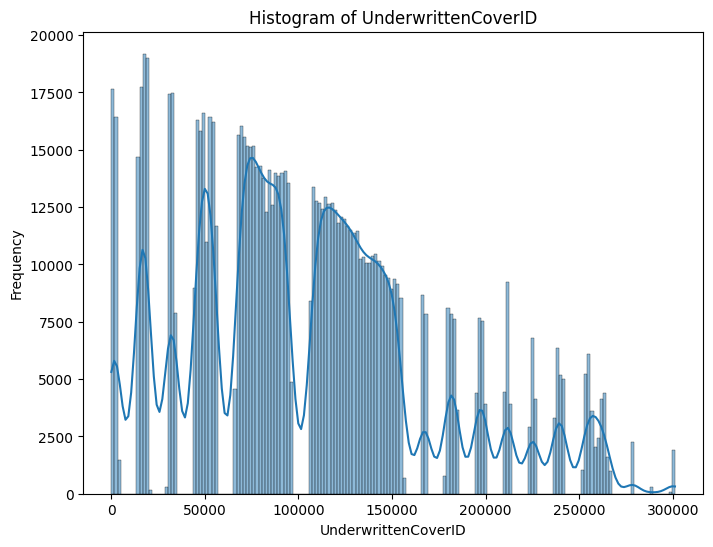

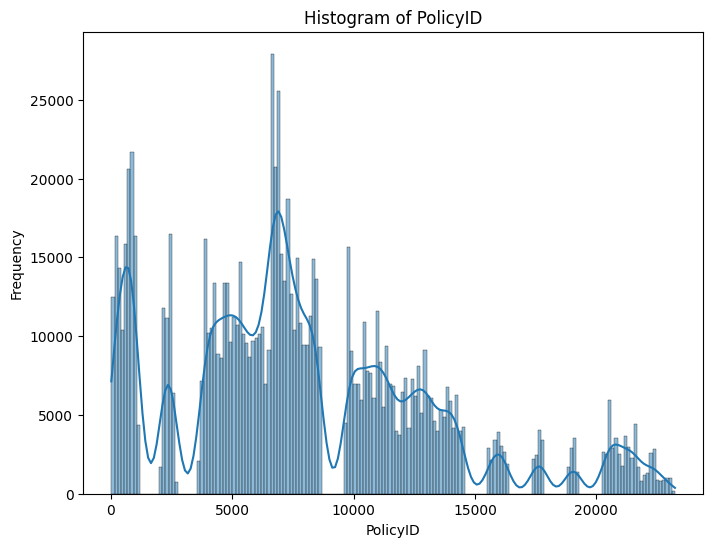

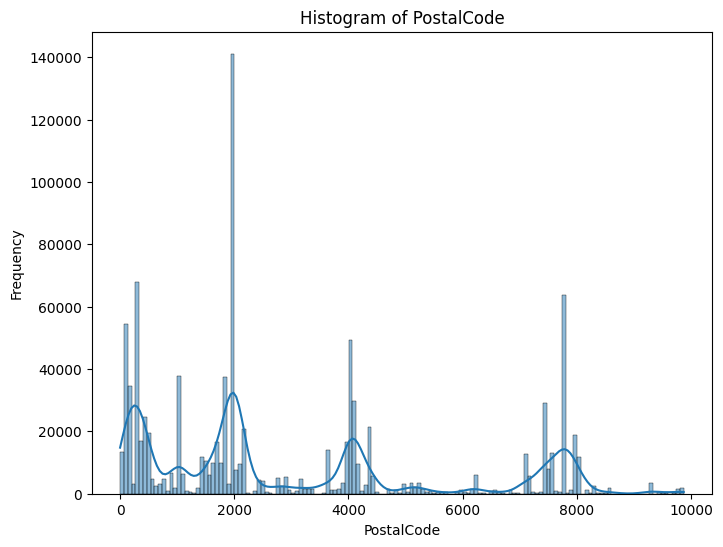

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns

#plot hist
for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show();

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(data=data, x=col)
  plt.title(f'Count Plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show();

5. Bivariate Analysis

In [ ]:
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
plt.title('Total Premium vs Total Claims by Postal Code')
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

6. Data Comparison

In [ ]:
# Example: Compare average TotalPremium by Province
avg_premium_by_province = data.groupby('Province')['TotalPremium'].mean().reset_index()
sns.barplot(x='Province', y='TotalPremium', data=avg_premium_by_province)
plt.title('Average Total Premium by Province')
plt.xticks(rotation=45)
plt.show()

7. Outlier Detection

In [ ]:
sns.boxplot(x=data['TotalPremium'])
plt.title('Boxplot of Total Premium')
plt.show()

8. Visualization

- Total Premium by Gender

In [ ]:
sns.barplot(x='Gender', y='TotalPremium', data=data)
plt.title('Total Premium by Gender')
plt.show()

- Total Claims Over Time

In [ ]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
claims_over_time = data.groupby(data['TransactionMonth'].dt.to_period('M')).sum()['TotalClaims']
claims_over_time.plot()
plt.title('Total Claims Over Time')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.show()

- Vehicle Types vs. Total Premium

In [ ]:
sns.boxplot(x='VehicleType', y='TotalPremium', data=data)
plt.title('Total Premium by Vehicle Type')
plt.xticks(rotation=45)
plt.show()